# Código: gerar mapa ilustrativo das atividades de flares ao longo das duas primeiras semanas de Maio de 2024

Aqui, mantive os erros como forma de aprendizagem e indo aprimorando o código

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

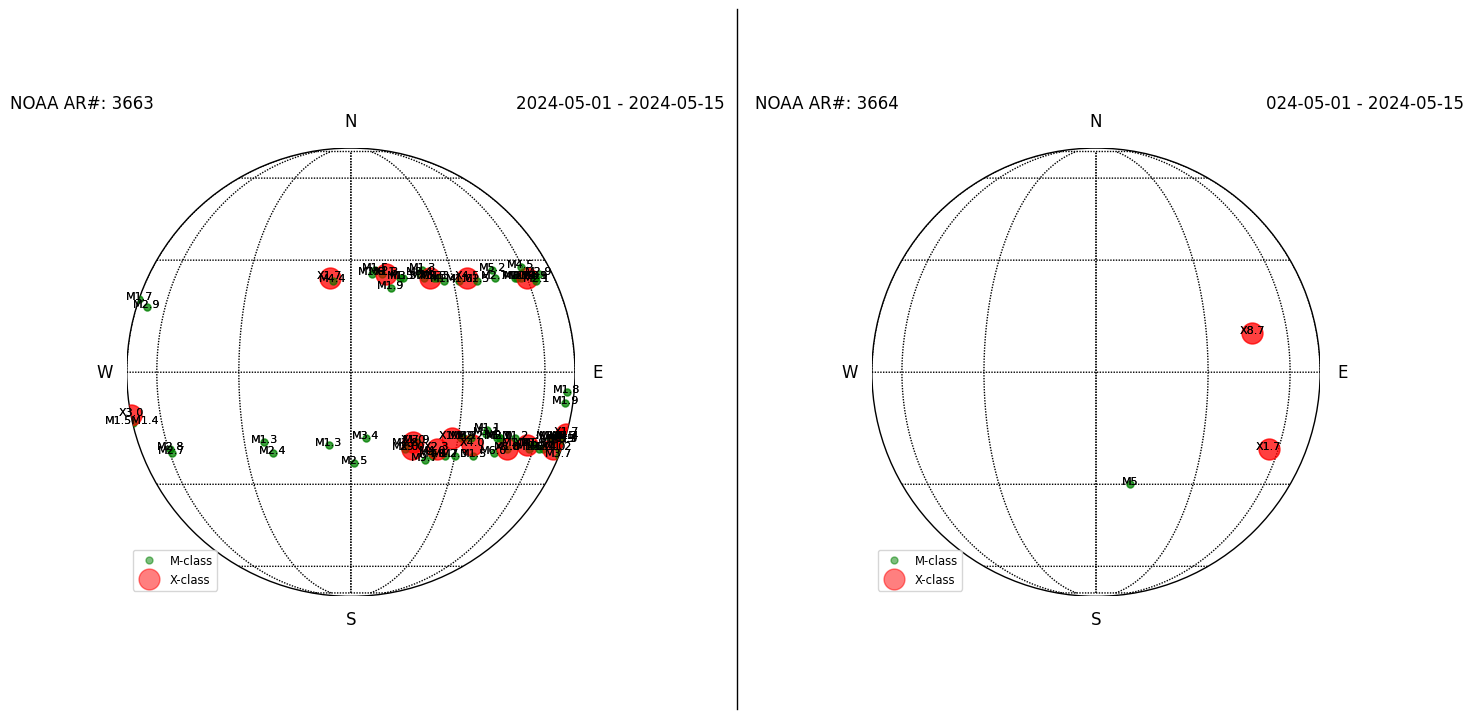

In [40]:
# Dados de exemplo para os flares e regiões ativas
regions = [
    {"region": "NOAA AR#: 3663", "date": "2024-05-01 - 2024-05-15", "coords": [(75, -8), (75, -5), (-59, -20), (-59, -21), 
    (-6, 25), (-5, 24), (6, 26), (9, 26), (7, 27), (14, 25), (15, 25), (20, 26), (10, 26), (21, 27), (-22, -21), (21, 25), (23, 25), (25, 25), 
    (24, 25), (-24, -18), (27, 24), (32, 24), (57, 25), (35, 25), (38, 24), (45, 25), (45, 27), (-6, -19), (1, -24), (54, 25), (55, 25), (60, 25),   
    (4, -17), (11, 22), (17, -18), (59, 28), (65, 25), (65, 24), (65, 25), (18, -18), (69, 26), (15, -20), (15, -19), (17, -20), (21, -23), (23, -21), 
    (23, -22), (27, -22), (30, -22), (24, -20), (39, -16), (31, -17), (32, -17), (28, -17), (36, -22), (-89, -13), (35, -19), (34, -17), (43, -21), 
    (39, -15), (48, -20), (44, -17), (43, -17), (51, -19), (48, -20), (44, -17), (58, -20), (56, -19), (60, -19), (59, -19), (50, -17), (63, -20), 
    (66, -20), (-88, 19), (68, -17), (70, -17), (74, -20), (72, -18), (81, -20), (81, -18), (89, -22), (81, -17), (89, -16), (89, -17), (89, -17),
    (89, -17), (89, -18), (-72, 17), (89, -18), (-89, -11), (-89, -10), (-89, -12)], 
     "flares": ["M1.9", "M1.8", "M2.8", "M2.7", "X1.7", "M4.4", "M1.6", "M9.1", "M1.5", "M1.3", "M3.3", "M8.4", "X1.3", "M1.3", "M2.4", "M7.5", 
                "X1.3", "M1.3", "M2.3", "M1.3", "M1.4", "M1.6", "M1.3", "X4.5", "M1.5", "M2.7", "M5.2", "M1.3", "M2.5", "M1.5", "M8.2", "X1.0",   
                "M3.4", "M1.9", "X1.0", "M4.5", "M1.9", "M2.1", "M4.1", "M7.9", "M2.9", "M2.0", "M1.8", "X9.0", "M9.7", "M4.0", "M4.6",
                "M1.7", "M2.3", "X2.3", "M3.1", "M2.9", "M3.7", "X1.1", "M1.5", "M1.5" "M1.4", "X4.0", "M2.2", "M6.0", "M1.1", "M1.8", "M2.0",
                "M1.1", "M1.9", "X5.8", "M3.1", "M1.6", "X1.5", "M1.8", "M8.9", "M1.2", "M3.2", "M2.4", "M1.7", "M1.0", "M1.6", "X1.0", "M1.3", 
                "M1.2", "M1.5", "M3.7", "M1.5", "X1.7", "X1.2", "X8.7", "M4.4", "X3.5", "M2.9", "M3.3", "X3.0"]}, 
    # Exemplo: (30, -10) - o 30 representa a longitude e -10 a latitude: 30 para o leste e -10 para o sul
    {"region": "NOAA AR#: 3664", "date": "024-05-01 - 2024-05-15", "coords": [(45, 10), (55, -20), (10, -30)], "flares": ["X8.7", "X1.7", "M5"]},
    # Adicione mais regiões e flares conforme necessário
]

# Função para criar um mapa solar esférico com marcações de flares
def create_solar_map(region, ax):
    # Criar o mapa esférico
    m = Basemap(projection='ortho', lon_0=0, lat_0=0, ax=ax)
    m.drawmapboundary()
    m.drawparallels(np.arange(-90., 91., 30.))
    m.drawmeridians(np.arange(0., 361., 30.))

    # Adicionar os pontos cardeais
    ax.text(0.5, 1.06, 'N', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(0.5, -0.05, 'S', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(1.05, 0.5, 'E', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(-0.05, 0.5, 'W', ha='center', va='center', transform=ax.transAxes, fontsize=12)

    # Adicionar a data no canto superior direito e o número da região ativa no canto superior esquerdo
    ax.text(1.1, 1.1, region["date"], ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(-0.1, 1.1, region["region"], ha='center', va='center', transform=ax.transAxes, fontsize=12)

    # Desenhar círculos de referência para as classes de flares
    flare_classes = {"M": 5, "X": 15}
    colors = {"M": 'green', "X": 'red'}
    for flare_class, size in flare_classes.items():
        m.plot([], [], 'o', markersize=size, color=colors[flare_class], alpha=0.5, label=f'{flare_class}-class')

    # Adicionar marcações de flares
        for coord, flare in zip(region["coords"], region["flares"]):
            lon, lat = coord
            flare_class = flare[0]
            size = flare_classes.get(flare_class, 5)
            color = colors.get(flare_class, 'black')
            x, y = m(lon, lat)
            m.plot(x, y, 'o', markersize=size, color=color, alpha=0.5)
            ax.text(x, y, flare, fontsize=8, ha='center', color='black')

    ax.legend(loc='lower left', fontsize='small')

# Criar os mapas
fig, axs = plt.subplots(1, len(regions), figsize=(15, 7))

# Adicionar uma linha vertical no meio
fig.add_artist(plt.Line2D([0.5, 0.5], [0, 1], color='black', linewidth=1))

for ax, region in zip(axs, regions):
    create_solar_map(region, ax)

plt.tight_layout()
plt.show()

## Separando em regiões ativas...

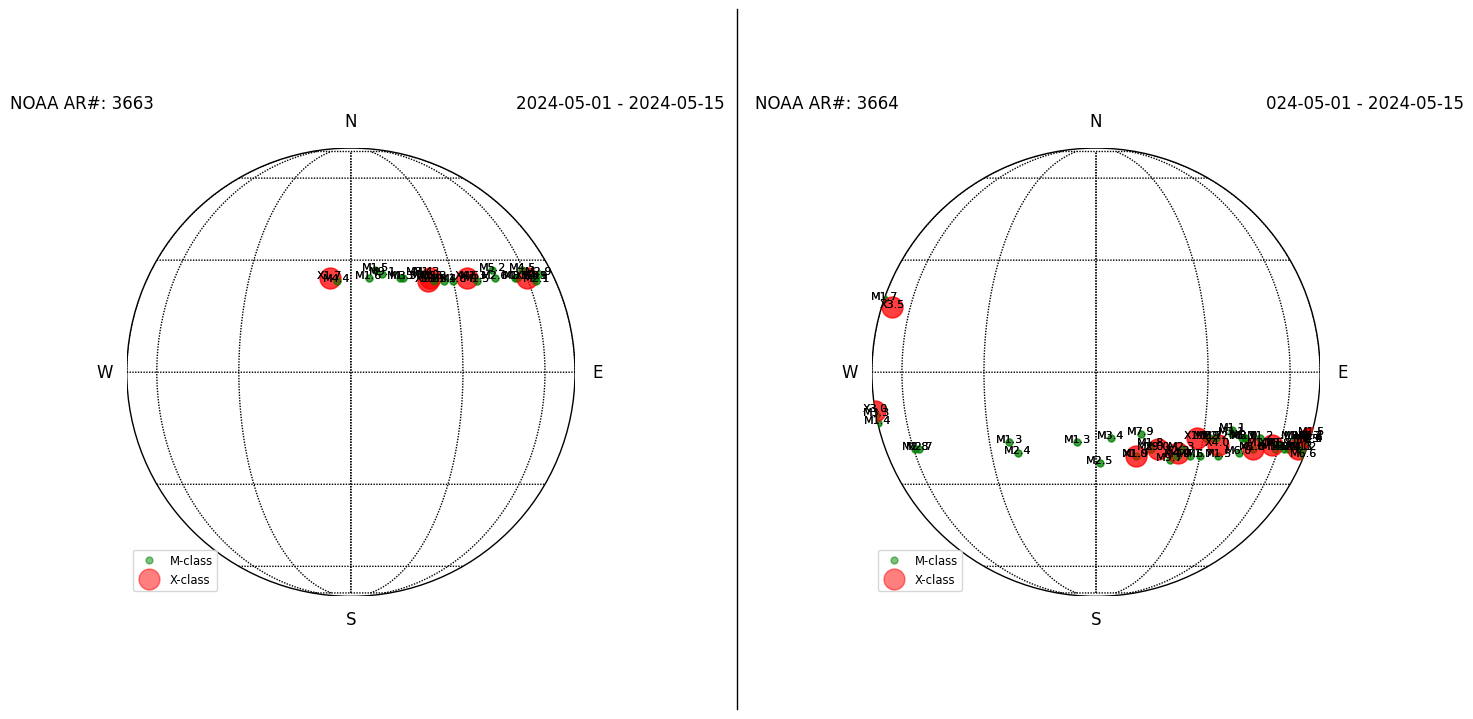

In [43]:
# Dados de exemplo para os flares e regiões ativas
regions = [
    {"region": "NOAA AR#: 3663", "date": "2024-05-01 - 2024-05-15", "coords": [(-6, 25), (-4, 24), (5, 25), (9, 26), (7, 27), (14, 25), (15, 25), 
                                                                               (20, 26), (22, 24), (22, 26), (21, 25), (23, 25), (24, 24), (24, 25), 
                                                                               (27, 24), (30, 24), (37, 25), (35, 25), (38, 24), (45, 25), (45, 27), 
                                                                                (54, 25), (55, 25), (60, 25), (59, 27), (65, 25), (65, 24), (65, 25), 
                                                                                (69, 26)], 
     "flares": ["X1.7", "M4.4", "M1.6", "M9.1", "M1.5", "M1.3", "M3.3", "M8.4", "X1.3", "M1.3", "M7.5", 
                "X1.3", "M1.3", "M2.3", "M1.4", "M1.6", "M1.3", "X4.5", "M1.5", "M2.6", "M5.2", "M1.5", "M8.2", "X1.0", "M4.5", "M1.9",  
               "M2.1", "M4.1", "M2.9"]}, 
    # Exemplo: (30, -10) - o 30 representa a longitude e -10 a latitude: 30 para o leste e -10 para o sul
    {"region": "NOAA AR#: 3664", "date": "024-05-01 - 2024-05-15", "coords": [(-59, -20), (-57, -20), (-22, -21), (-24, -18), (-5, -18), (1, -24),
                                                                             (4, -17), (11, -22), (11, -22), (12, -16), (15, -20), (15, -19), (17, -20),
                                                                             (21, -23), (23, -21), (23, -22), (27, -22), (30, -22), (24, -20),
                                                                              (39, -16), (31, -17), (32, -17), (28, -17), (36, -22), (-89, -13), #AR?
                                                                              (35, -19), (34, -17), (43, -21), (39, -15), (48, -20), (44, -17),
                                                                              (43, -17), (51, -19), (48, -20), (44, -17), (58, -20), (56, -19),
                                                                              (60, -19), (59, -19), (50, -17), (63, -20),  (66, -20), (-88, 19), #AR? 
                                                                               (68, -17), (70, -17), (74, -20), (75, -20), (81, -20), (81, -18),
                                                                               (89, -22), (81, -17), (89, -16), (89, -17), (89, -17), (89, -17),
                                                                               (89, -18), (-72, 17), (89, -18),  (-89, -11), (-89, -10), (-89, -12)], 
     "flares": ["M2.8", "M2.7", "M2.4", "M1.3", "M1.3", "M2.5", "M3.4", "M1.9", "X1.0", "M7.9", "M2.0", "M1.8", "X9.0", "M9.7", "X2.3",
                "M4.0", "M4.6", "M1.7", "M2.3", "M3.1", "M2.9", "M3.7", "X1.1", "M1.5", "M1.4", "X4.0", "M2.2", "M6.0", "M1.1", "M1.8", 
                "M2.0", "M1.1", "M1.9", "X5.8", "M3.1", "M1.6", "X1.5", "M1.8", "M8.9", "M1.2", "M3.2", "M2.4", "M1.7", "M1.0", "M1.6",
                "X1.0", "M1.3", "M1.2", "M1.5", "M6.6", "M3.7", "M1.5", "X1.7", "X1.2", "X8.7", "M4.4", "X3.5", "M2.9", "M3.3", "X3.0"]},
    # Adicione mais regiões e flares conforme necessário
]

# Função para criar um mapa solar esférico com marcações de flares
def create_solar_map(region, ax):
    # Criar o mapa esférico
    m = Basemap(projection='ortho', lon_0=0, lat_0=0, ax=ax)
    m.drawmapboundary()
    m.drawparallels(np.arange(-90., 91., 30.))
    m.drawmeridians(np.arange(0., 361., 30.))

    # Adicionar os pontos cardeais
    ax.text(0.5, 1.06, 'N', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(0.5, -0.05, 'S', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(1.05, 0.5, 'E', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(-0.05, 0.5, 'W', ha='center', va='center', transform=ax.transAxes, fontsize=12)

    # Adicionar a data no canto superior direito e o número da região ativa no canto superior esquerdo
    ax.text(1.1, 1.1, region["date"], ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(-0.1, 1.1, region["region"], ha='center', va='center', transform=ax.transAxes, fontsize=12)

    # Desenhar círculos de referência para as classes de flares
    flare_classes = {"M": 5, "X": 15}
    colors = {"M": 'green', "X": 'red'}
    for flare_class, size in flare_classes.items():
        m.plot([], [], 'o', markersize=size, color=colors[flare_class], alpha=0.5, label=f'{flare_class}-class')

    # Adicionar marcações de flares
        for coord, flare in zip(region["coords"], region["flares"]):
            lon, lat = coord
            flare_class = flare[0]
            size = flare_classes.get(flare_class, 5)
            color = colors.get(flare_class, 'black')
            x, y = m(lon, lat)
            m.plot(x, y, 'o', markersize=size, color=color, alpha=0.5)
            ax.text(x, y, flare, fontsize=8, ha='center', color='black')

    ax.legend(loc='lower left', fontsize='small')

# Criar os mapas
fig, axs = plt.subplots(1, len(regions), figsize=(15, 7))

# Adicionar uma linha vertical no meio
fig.add_artist(plt.Line2D([0.5, 0.5], [0, 1], color='black', linewidth=1))

for ax, region in zip(axs, regions):
    create_solar_map(region, ax)

plt.tight_layout()
plt.show()

## Retirando as marcações dos flares...

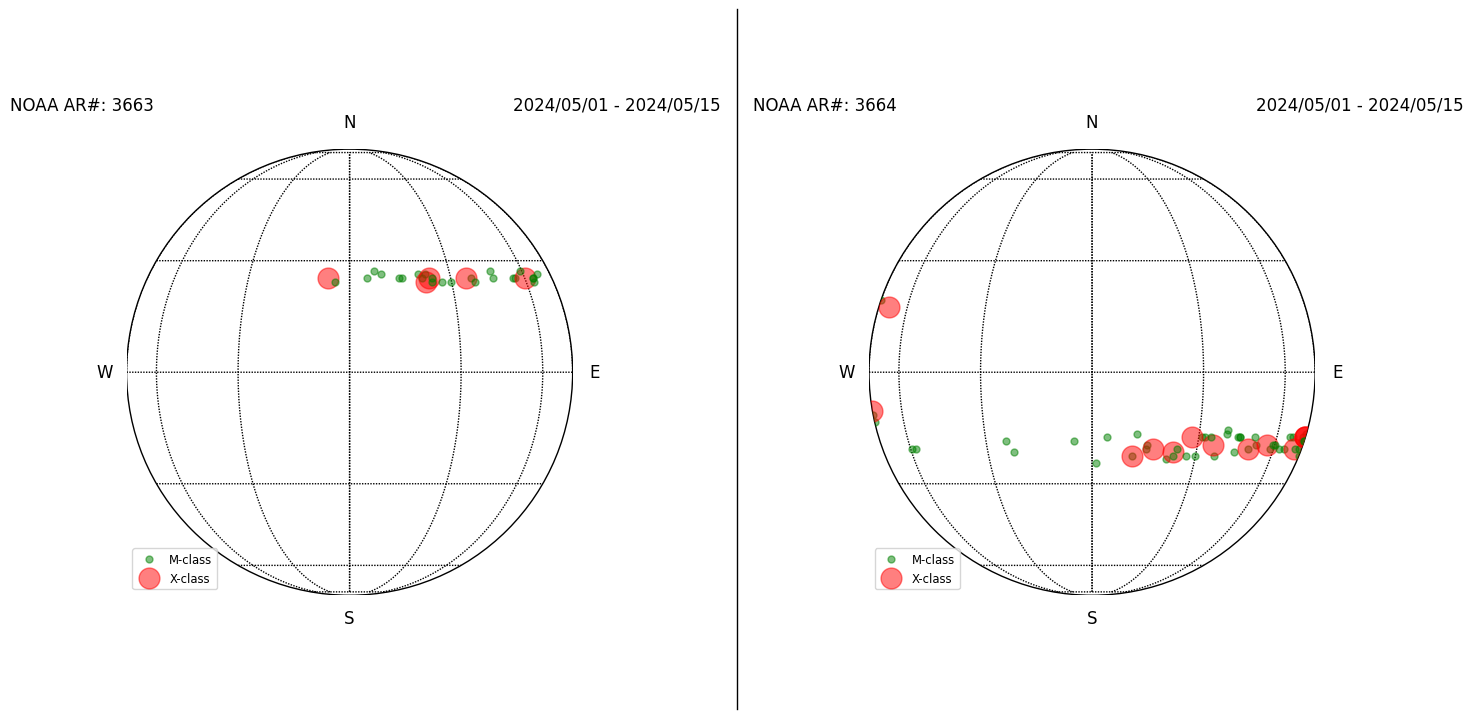

In [46]:
# Dados de exemplo para os flares e regiões ativas
regions = [
    {"region": "NOAA AR#: 3663", "date": "2024/05/01 - 2024/05/15", "coords": [(-6, 25), (-4, 24), (5, 25), (9, 26), (7, 27), (14, 25), (15, 25), 
                                                                               (20, 26), (22, 24), (22, 26), (21, 25), (23, 25), (24, 24), (24, 25), 
                                                                               (27, 24), (30, 24), (37, 25), (35, 25), (38, 24), (45, 25), (45, 27), 
                                                                               (54, 25), (55, 25), (60, 25), (59, 27), (65, 25), (65, 24), (65, 25), 
                                                                               (69, 26)], 
     "flares": ["X1.7", "M4.4", "M1.6", "M9.1", "M1.5", "M1.3", "M3.3", "M8.4", "X1.3", "M1.3", "M7.5", 
                "X1.3", "M1.3", "M2.3", "M1.4", "M1.6", "M1.3", "X4.5", "M1.5", "M2.6", "M5.2", "M1.5", "M8.2", "X1.0", "M4.5", "M1.9",  
                "M2.1", "M4.1", "M2.9"]}, 
    # Exemplo: (30, -10) - o 30 representa a longitude e -10 a latitude: 30 para o leste e -10 para o sul
    {"region": "NOAA AR#: 3664", "date": "2024/05/01 - 2024/05/15", "coords": [(-59, -20), (-57, -20), (-22, -21), (-24, -18), (-5, -18), (1, -24),
                                                                             (4, -17), (11, -22), (11, -22), (12, -16), (15, -20), (15, -19), (17, -20),
                                                                             (21, -23), (23, -21), (23, -22), (27, -22), (30, -22), (24, -20),
                                                                              (39, -16), (31, -17), (32, -17), (28, -17), (36, -22), (-89, -13), #AR?
                                                                              (35, -19), (34, -17), (43, -21), (39, -15), (48, -20), (44, -17),
                                                                              (43, -17), (51, -19), (48, -20), (44, -17), (58, -20), (56, -19),
                                                                              (60, -19), (59, -19), (50, -17), (63, -20),  (66, -20), (-88, 19), #AR? 
                                                                               (68, -17), (70, -17), (74, -20), (75, -20), (81, -20), (81, -18),
                                                                               (89, -22), (81, -17), (89, -16), (89, -17), (89, -17), (89, -17),
                                                                               (89, -18), (-72, 17), (89, -18),  (-89, -11), (-89, -10), (-89, -12)], 
     "flares": ["M2.8", "M2.7", "M2.4", "M1.3", "M1.3", "M2.5", "M3.4", "M1.9", "X1.0", "M7.9", "M2.0", "M1.8", "X9.0", "M9.7", "X2.3",
                "M4.0", "M4.6", "M1.7", "M2.3", "M3.1", "M2.9", "M3.7", "X1.1", "M1.5", "M1.4", "X4.0", "M2.2", "M6.0", "M1.1", "M1.8", 
                "M2.0", "M1.1", "M1.9", "X5.8", "M3.1", "M1.6", "X1.5", "M1.8", "M8.9", "M1.2", "M3.2", "M2.4", "M1.7", "M1.0", "M1.6",
                "X1.0", "M1.3", "M1.2", "M1.5", "M6.6", "M3.7", "M1.5", "X1.7", "X1.2", "X8.7", "M4.4", "X3.5", "M2.9", "M3.3", "X3.0"]},
    # Adicione mais regiões e flares conforme necessário
]

# Função para criar um mapa solar esférico com marcações de flares
def create_solar_map(region, ax):
    # Criar o mapa esférico
    m = Basemap(projection='ortho', lon_0=0, lat_0=0, ax=ax)
    m.drawmapboundary()
    m.drawparallels(np.arange(-90., 91., 30.))
    m.drawmeridians(np.arange(0., 361., 30.))

    # Adicionar os pontos cardeais
    ax.text(0.5, 1.06, 'N', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(0.5, -0.05, 'S', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(1.05, 0.5, 'E', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(-0.05, 0.5, 'W', ha='center', va='center', transform=ax.transAxes, fontsize=12)

    # Adicionar a data no canto superior direito e o número da região ativa no canto superior esquerdo
    ax.text(1.1, 1.1, region["date"], ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(-0.1, 1.1, region["region"], ha='center', va='center', transform=ax.transAxes, fontsize=12)

    # Desenhar círculos de referência para as classes de flares
    flare_classes = {"M": 5, "X": 15}
    colors = {"M": 'green', "X": 'red'}
    for flare_class, size in flare_classes.items():
        m.plot([], [], 'o', markersize=size, color=colors[flare_class], alpha=0.5, label=f'{flare_class}-class')

    # Adicionar marcações de flares
    for coord, flare in zip(region["coords"], region["flares"]):
        lon, lat = coord
        flare_class = flare[0]
        size = flare_classes.get(flare_class, 5)
        color = colors.get(flare_class, 'black')
        x, y = m(lon, lat)
        m.plot(x, y, 'o', markersize=size, color=color, alpha=0.5)

    ax.legend(loc='lower left', fontsize='small')

# Criar os mapas
fig, axs = plt.subplots(1, len(regions), figsize=(15, 7))

# Adicionar uma linha vertical no meio
fig.add_artist(plt.Line2D([0.5, 0.5], [0, 1], color='black', linewidth=1))

for ax, region in zip(axs, regions):
    create_solar_map(region, ax)

plt.tight_layout()
plt.show()

## Ajustando as legendas... O correto!

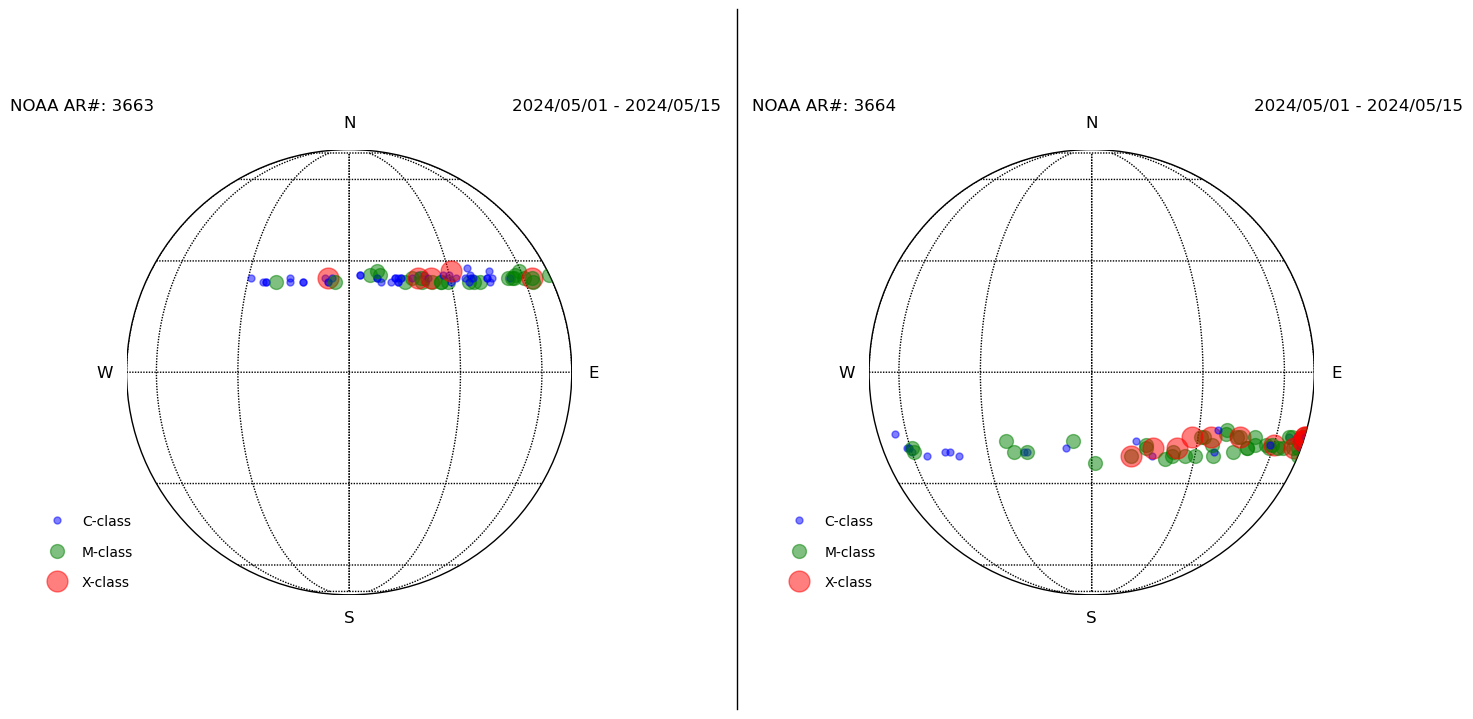

In [4]:
# Dados de exemplo para os flares e regiões ativas
regions = [
    {"region": "NOAA AR#: 3663", "date": "2024/05/01 - 2024/05/15", "coords": [(-29, 25), (-25, 24), (-24, 24), (-24, 24), # 01/05/2024
                                                                               (-21, 24), (-17, 25), (-17, 24), (-13, 24), (-13, 24), # 02/05/2024
                                                                               (-7, 25), (-6, 24), (-6, 25), (-6, 24), (-5, 25), (-4, 24), (3, 26), #03/05/2024
                                                                               (6, 26), (8, 25), (3,26), (9, 26), (8, 25), (8, 27), (9, 24), (12, 24), (15, 25), (13, 25), (13, 25), (14,25), (16, 24), (14, 24), #04/05/2024
                                                                               (14, 24), (15,25), #04/05/2024
                                                                               (20, 26), (21, 24), (18, 25), (18, 25), (22, 24), (22, 26), (20, 25), (21, 25), (23, 25), (24, 24), (24, 25), (27, 24), #05/05/2024
                                                                               (27, 24), (32, 25), (29, 24), #05/05/2024
                                                                               (28, 26), (30, 24), (30, 26), (36, 24), (37, 25), (35, 25), (38, 24), (31, 27), (40, 24), (36,24), (37, 26), (43, 25), #06/05/2024
                                                                               (37, 28), (44, 24), (43, 25), (38, 25), #06/05/2024
                                                                               (45, 25), (45, 27), (52, 25), (54, 25), (53, 25), (56, 26), (55,25), #07/05/2024
                                                                               (60, 25), (59, 27), (65, 25), (65, 24), (65, 25), #08/05/2024
                                                                               # no activity on 09/05/2024
                                                                               (88, 26), #10/05/2024
                                                                               # no activity on 11/05, 12/05, 13/05 and 14/05
                                                                               ], 
     "flares": ["C1.7", "C3.7", "C1.9", "C1.9", #01/05/2024 
                "M1.0", "C2.7", "C4.3", "C3.6", "C1.9", #02/05/2024
                "C2.6", "C2.4", "X1.6", "C6.0", "C6.7", "M4.4", "C7.5", #03/05/2024
                "M1.6", "C5.5", "C3.1", "M9.1", "C8.5", "M1.5", "C4.5", "C4.2", "C3.8", "C6.3", "C9.1", "C4.0", "M1.3", "C5.6", "C6.0", "C4.4", "C4.7", "M3.2", #04/05/2024
                "M8.4", "C8.8", "C8.4", "C5.5", "X1.3", "M1.3", "C8.4", "M7.4", "X1.3", "M1.3", "M2.2", "C8.7", "M1.3", "C2.0", "C6.1", #05/05/2024
                "C3.9", "M1.6", "C5.8", "C8.8", "M1.3", "X4.5", "M1.5", "C6.5", "C9.3", "C4.4", "C6.2", "C4.3", "C2.7", "C3.7", "C2.9", "C9.4", #06/05/2024
                "M2.6", "M5.1", "C9.5", "M1.5", "M1.0", "M1.0", "M8.2", #07/05/2024
                "X1.0", "M4.5", "M1.8", "M2.1", "M4.1", #08/05/2024
                "C8.0" #10/05/2024
               ]}, 
    # Exemplo: (30, -10) - o 30 representa a longitude e -10 a latitude: 30 para o leste e -10 para o sul
    {"region": "NOAA AR#: 3664", "date": "2024/05/01 - 2024/05/15", "coords": [(-67, -16), (-62, -20), (-60, -21), (-61, -20), (-61, -20), (-59, -20), #02/05/2024
                                                                               (-59, -21), (-53, -22), (-45, -21), (-43, -21), # 03/05/2024
                                                                               (-40, -22), # 04/05/2024
                                                                               (-22, -21), (-19, -21), (-24, -18), (-18, -21), (-18, -21), #05/05/2024
                                                                               # no activity on 06/05/2024
                                                                               (-5, -18), (1, -24), #07/05/2024
                                                                               (-7, -20), (11, -22), (11, -22), (12, -18), (17, -22), (15, -20), (15, -19), (17, -20), (21, -23), #08/05/2024 
                                                                               (23, -21), (23, -22), (27, -22), (30, -22), (24, -20), (39, -16), (31, -17), (32, -17), (28, -17), #09/05/2024
                                                                               (36, -22), (36, -21), (35, -19), (34, -17), (43, -21), (39, -15), (36, -15), (59, -19), (48, -20), (44, -17), (43, -17), #10/05/2024
                                                                               (51, -19), (48, -20), #10/05/2024
                                                                               (44, -17), (58, -20), (56, -19), (60, -19), (59, -19), (50, -17), (63, -20), (58, -19), #11/05/2024 
                                                                               (66, -20), (68, -17), (68, -17), (70, -17), (74, -20), (76, -18), (75, -20), #12/05/2024
                                                                               (82, -16), (76, -18), (81, -20), (82, -19), (83, -17), (82, -18), (75, -17), (84, -20), (81, -18), (89, -22), (81, -17), #13/05/2024
                                                                               (89, -16), (89, -17), #13/05/2024
                                                                               (89, -17), (89, -17), (89, -17), (89, -18), #14/05/2024  
                                                                               (89, -18)], #15/05/2024
     "flares": ["C1.6", "C3.7", "C6.3", "C8.7", "C4.0", "M2.7", #02/05/2024
                "M2.7", "C5.3", "C8.0", "C4.6", #03/05/2024
                "C5.8", #04/05/2024 
                "M2.3", "C7.5", "M1.3", "C6.4", "M1.0", #05/05/2024
                "M1.3", "M2.4", #07/05/2024 
                "C8.4", "M1.8", "X1.0", "C6.6", "C6.6", "M2.0", "M1.7", "X1.0", "M9.7", #08/05/2024
                "M4.0", "M4.5", "M1.7", "M2.3", "X2.2", "M3.1", "M2.9", "M3.7", "X1.1", #09/05/2024
                "M1.3", "C9.8", "M1.3", "X3.9", "M2.2", "M5.9", "C6.9", "C9.1", "M1.1", "M1.7", "M2.0", "M1.1", "M1.9", #10/05/2024 
                "X5.8", "M3.1", "M1.6", "X1.5", "M1.7", "M8.8", "M1.2", "C9.4", #11/05/2024 
                "M3.2", "C9.2", "M1.6", "M1.0", "M1.5", "C7.0", "X1.0", #12/05/2024 
                "C6.4", "C9.4", "M1.2", "C5.8", "C5.0", "C5.3", "C5.3", "C6.4", "M1.2", "M1.4", "M6.6", "M3.7", "M1.5", #13/05/2024
                "X1.7", "X1.2", "C9.6", "X8.7", #14/05/2024 
                "X3.4" #15/05/2024
               ]},
    # Adicione mais regiões e flares conforme necessário
]

# Função para criar um mapa solar esférico com marcações de flares
def create_solar_map(region, ax):
    # Criar o mapa esférico
    m = Basemap(projection='ortho', lon_0=0, lat_0=0, ax=ax)
    m.drawmapboundary()
    m.drawparallels(np.arange(-90., 91., 30.))
    m.drawmeridians(np.arange(0., 361., 30.))

    # Adicionar os pontos cardeais
    ax.text(0.5, 1.06, 'N', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(0.5, -0.05, 'S', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(1.05, 0.5, 'E', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(-0.05, 0.5, 'W', ha='center', va='center', transform=ax.transAxes, fontsize=12)

    # Adicionar a data no canto superior direito e o número da região ativa no canto superior esquerdo
    ax.text(1.1, 1.1, region["date"], ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(-0.1, 1.1, region["region"], ha='center', va='center', transform=ax.transAxes, fontsize=12)

    # Desenhar círculos de referência para as classes de flares
    flare_classes = {"C": 5, "M": 10, "X": 15}
    colors = {"C": 'blue', "M": 'green', "X": 'red'}
    for flare_class, size in flare_classes.items():
        m.plot([], [], 'o', markersize=size, color=colors[flare_class], alpha=0.5, label=f'{flare_class}-class')

    # Adicionar marcações de flares
    for coord, flare in zip(region["coords"], region["flares"]):
        lon, lat = coord
        flare_class = flare[0]
        size = flare_classes.get(flare_class, 5)
        color = colors.get(flare_class, 'black')
        x, y = m(lon, lat)
        m.plot(x, y, 'o', markersize=size, color=color, alpha=0.5)

    ax.legend(loc='lower left', fontsize='medium', frameon=False, bbox_to_anchor=(-0.2, 0), borderaxespad=0, labelspacing=1.2)

# Criar os mapas
fig, axs = plt.subplots(1, len(regions), figsize=(15, 7))

# Adicionar uma linha vertical no meio
fig.add_artist(plt.Line2D([0.5, 0.5], [0, 1], color='black', linewidth=1))

for ax, region in zip(axs, regions):
    create_solar_map(region, ax)

plt.tight_layout()

# Salvar a figura como um arquivo .jpg
plt.savefig('solar_activity.jpg', format='jpg', dpi=300)

#Exibir a figura
plt.show()